In [34]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.


In [35]:
from pyspark.sql import SparkSession as ss

In [39]:
spark=ss.builder.master("local").appName("DogeEDA").getOrCreate()


23/11/08 22:50:40 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [40]:
df = spark.read.csv("TopRichestInWorld.csv", header=True, inferSchema=True)

In [41]:
spark

In [42]:
df.show()

+--------------------+----------------+---+-----------------+--------------------+--------------------+
|                Name|        NetWorth|Age|Country/Territory|              Source|            Industry|
+--------------------+----------------+---+-----------------+--------------------+--------------------+
|           Elon Musk|$219,000,000,000| 50|    United States|       Tesla, SpaceX|          Automotive|
|          Jeff Bezos|$171,000,000,000| 58|    United States|              Amazon|          Technology|
|Bernard Arnault &...|$158,000,000,000| 73|           France|                LVMH|    Fashion & Retail|
|          Bill Gates|$129,000,000,000| 66|    United States|           Microsoft|          Technology|
|      Warren Buffett|$118,000,000,000| 91|    United States|  Berkshire Hathaway|Finance & Investm...|
|          Larry Page|$111,000,000,000| 49|    United States|              Google|          Technology|
|         Sergey Brin|$107,000,000,000| 48|    United States|   

In [43]:
df.show(2)

+----------+----------------+---+-----------------+-------------+----------+
|      Name|        NetWorth|Age|Country/Territory|       Source|  Industry|
+----------+----------------+---+-----------------+-------------+----------+
| Elon Musk|$219,000,000,000| 50|    United States|Tesla, SpaceX|Automotive|
|Jeff Bezos|$171,000,000,000| 58|    United States|       Amazon|Technology|
+----------+----------------+---+-----------------+-------------+----------+
only showing top 2 rows



In [44]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- NetWorth: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Country/Territory: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Industry: string (nullable = true)



In [45]:
df.describe().toPandas()

,summary,Name,NetWorth,Age,Country/Territory,Source,Industry
0,count,101,101,101,101,101,101
1,mean,None,None,67.11881188118812,None,None,None
2,stddev,None,None,13.892650667682444,None,None,None
3,min,Abigail Johnson,"$106,000,000,000",30,Australia,"Aldi, Trader Joe's",Automotive
4,max,Zhong Shanshan,"$91,400,000,000",94,United States,vaccines,Telecom


In [46]:
df.groupby('Country/Territory').count().show()

+-----------------+-----+
|Country/Territory|count|
+-----------------+-----+
|           Russia|    2|
|           Sweden|    1|
|        Singapore|    1|
|          Germany|    7|
|           France|    7|
|    United States|   37|
|            India|    7|
|            China|   18|
|            Chile|    1|
|            Italy|    2|
|            Spain|    1|
|        Hong Kong|    4|
|           Mexico|    2|
|        Indonesia|    2|
|      Switzerland|    1|
|           Canada|    2|
|            Japan|    3|
|        Australia|    2|
|          Austria|    1|
+-----------------+-----+



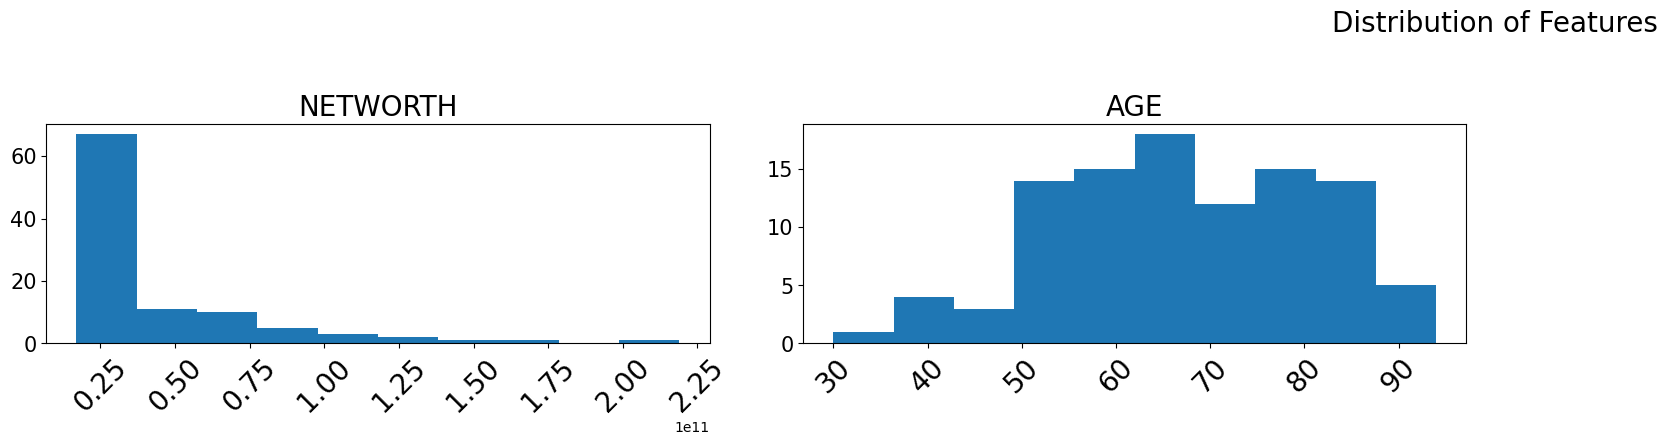

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' containing your data

fig = plt.figure(figsize=(30,10))
st = fig.suptitle("Distribution of Features", fontsize=20,
verticalalignment="center", )

for col, num in zip(df.toPandas().describe().columns, range(1, 11)):
 ax = fig.add_subplot(3, 4, num)
 ax.hist(df.toPandas()[col])
 plt.grid(False)
 plt.xticks(rotation=45, fontsize=20)
 plt.yticks(fontsize=15)
 plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [52]:
# Import necessary functions for data transformation
from pyspark.sql.functions import regexp_replace, col

# Remove non-numeric characters (like '$' and commas) and cast to double
df = df.withColumn("NetWorth", regexp_replace("NetWorth", "[^0-9.]", "").cast("double"))

# Now you can calculate the correlation
correlation = df.corr("Age", "NetWorth")
print("Correlation between Age and NetWorth:", correlation)


Correlation between Age and NetWorth: -0.07447404276033685


In [56]:
from pyspark.sql.functions import desc

# Sort the DataFrame by 'NetWorth' in descending order
df = df.orderBy(desc("NetWorth"))

# Show the sorted DataFrame
df.show()


+--------------------+--------+---+-----------------+--------------------+--------------------+
|                Name|NetWorth|Age|Country/Territory|              Source|            Industry|
+--------------------+--------+---+-----------------+--------------------+--------------------+
|           Elon Musk| 2.19E11| 50|    United States|       Tesla, SpaceX|          Automotive|
|          Jeff Bezos| 1.71E11| 58|    United States|              Amazon|          Technology|
|Bernard Arnault &...| 1.58E11| 73|           France|                LVMH|    Fashion & Retail|
|          Bill Gates| 1.29E11| 66|    United States|           Microsoft|          Technology|
|      Warren Buffett| 1.18E11| 91|    United States|  Berkshire Hathaway|Finance & Investm...|
|          Larry Page| 1.11E11| 49|    United States|              Google|          Technology|
|         Sergey Brin| 1.07E11| 48|    United States|              Google|          Technology|
|       Larry Ellison| 1.06E11| 77|    U